## ■ 3차원 합성곱 코드(예제)

In [ ]:
import numpy as np

x=np.array([[[1,2,3,0],
            [0,1,2,3],  # --> red 행렬
            [3,0,1,2],
            [2,3,0,1]],

           [[2,3,4,1],
            [1,2,3,4],  # --> green 행렬
            [4,1,2,3],
            [3,4,1,2]],

           [[3,4,5,2],  # --> blue 행렬
            [2,3,4,5],
            [5,2,3,4],
            [4,5,2,3]]])

print(x.ndim) #3
print(x.shape) #(3,4,4)

f=np.array([[[2,0,1],
            [0,1,2],
            [1,0,2]],

           [[3,1,2],
            [1,2,3],
            [2,1,3]],

           [[4,2,3],
            [2,3,4],
            [3,2,4]]])

print(f.ndim)  # 3
print(f.shape) #(3,3,3)

row = x.shape[1] - f.shape[1] + 1 # 행 - 0,1 # 2
col = x.shape[2] - f.shape[2] + 1 # 열 - 0,1 # 2

x2 = np.array([[0]*col]*row) # x2 라는 비어있는 행렬을 생성해서 채워넣을꺼임.

for i in range(row): # 0,1
    for j in range(col): # 0,1
        for k in range(x.shape[0]): # 0,1,2
            x2[i][j] += np.sum(x[k, i:f.shape[1]+i, j:f.shape[2]+j]*f[k])
"""
i = 0일때
    j = 0
        k=0 x2[0][0] = x[0, 0:3+0, 0:3+0] * f[0] # red
        k=1 x2[0][0] = x[1, 0:3+0, 0:3+0] * f[1] # green
        k=2 x2[0][0] = x[2, 0:3+0, 0:3+0] * f[2] # blue  
        
    j = 1 # 열 한칸 이동
        k=0 x2[0][0] = x[0, 0:3+0, 1:3+1] * f[0] # red
        k=1 x2[0][0] = x[1, 0:3+0, 1:3+1] * f[1] # green
        k=2 x2[0][0] = x[2, 0:3+0, 1:3+1] * f[2] # blue  

i = 1일때 # 행을 아래로 이동
    j = 0
        k=0 x2[0][0] = x[0, 1:3+1, 0:3+0] * f[0] # red
        k=1 x2[0][0] = x[1, 1:3+1, 0:3+0] * f[1] # green
        k=2 x2[0][0] = x[2, 1:3+1, 0:3+0] * f[2] # blue  
        
    j = 1 # 열 한칸 이동
        k=0 x2[0][0] = x[0, 1:3+0, 1:3+1] * f[0] # red
        k=1 x2[0][0] = x[1, 1:3+0, 1:3+1] * f[1] # green
        k=2 x2[0][0] = x[2, 1:3+0, 1:3+1] * f[2] # blue  

"""            
print(x2)

## ■ 3차원 데이터의 합성곱 연산 P.235

" 이미지의 색깔이 보통은 흑백이 아니라 RGB 컬러이므로 RGB(Red, Green, Blue) 컬러에 합성곱을 해야한다. "

## 예제1. 레드벨벳의 아이린 사진을 3차원 행렬로 변환하시오!

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)
print(img_pixel)
plt.show()

In [ ]:
"""
 Red Green Blue
 
[[222 202 203] ---> 픽셀 하나의 숫자가 0~255 사이의 숫자로 되어있고 숫자가 클수록 밝은 색이다.
  [223 203 204]
  [225 205 206]
  ...
  [165 150 147]
  [176 160 160]
  [184 168 169]]]
"""

## 예제2. 아이린 사진을 numpy 배열로 변환한 행렬의 shape를 확인하시오!

(500, 500, 3)


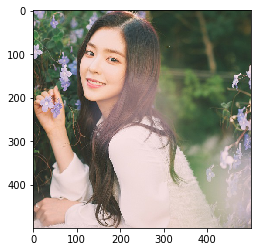

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)
print(img_pixel.shape) # (500, 500, 3) # 500 -> 가로 // 500 -> 세로 // 3 -> 색상( 0 = red, 1 = green, 2 = blue)
plt.show()

## 예제3. 아이린 사진에서 red 부분의 행렬만 출력하고 red 부분만 이미지로 시각화 하시오!

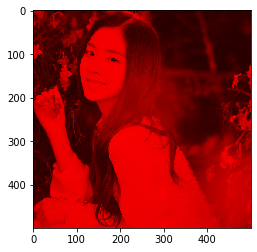

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])
img_pixel[:,:,1] = 0 # green 부분은 0으로 처리
img_pixel[:,:,2] = 0 # blue 부분은 0으로 처리
plt.imshow(img_pixel)
plt.show()

## 예제4. 아이린 사진의 green 부분을 행렬 숫자를 출력하고 green 부분만 시각화 하시오!

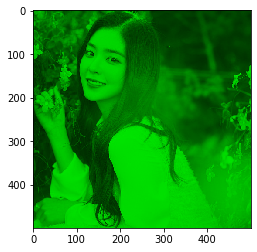

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])
img_pixel[:,:,0] = 0 # red 부분은 0으로 처리
img_pixel[:,:,2] = 0 # blue 부분은 0으로 처리
plt.imshow(img_pixel)
plt.show()

## 예제5. 아이린 사진을 3차원 합성곱 하기 위한 필터를 3x3으로 생성하시오.

In [20]:
import numpy as np

filter = np.random.randn(1,3,3,3)
print(filter)

[[[[ 0.3450325   0.13175227  1.30574913]
   [-0.80846797  0.32643288 -1.4525919 ]
   [-0.23834479  0.08672642 -0.45556634]]

  [[ 0.55271905  1.40072461  0.05082649]
   [-0.13729939  0.75061131  0.59219847]
   [-0.09071458 -0.27158216  0.1272726 ]]

  [[ 0.4023788   0.93816275 -0.17456354]
   [ 0.18909537 -1.46999966  1.15935878]
   [-0.03264811  0.02624826 -1.08034051]]]]


## 예제6. 위의 필터에서 red 부분 필터의 행렬만 출력하시오!

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)
filter = np.random.randn(1,3,3,3)

print(filter[:,:,0])
print(filter[:,:,0].shape)

[[[-0.60040391 -0.17804862  0.0028959 ]
  [ 0.3632555  -0.22585836  0.06332326]
  [-0.75399432 -0.092218    1.9386371 ]]]
(1, 3, 3)


## 예제7. 아이린 사진(500x500) 행렬을 3x3 필터로 합성곱을 하면 출력행렬의 크기가 어떻게 되겠는가? 패딩은 0입니다.(p.234 식 7.1 참고)

## 문제69.(점심시간 문제)  
## 500x500 사이즈의 아이린 RGB컬러인 아이린사진을 3x3필터 RGB필터로 3차원 합성곱한 결과인 498x498 feature map을 생성하시오!

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('d:\\배경화면.jpg')
x = np.array(img)

filter = np.random.randn(1,3,3,3)

f = filter.reshape(3,3,3)

row = x.shape[0] - f_r.shape[1] + 1 # 행 
col = x.shape[1] - f_r.shape[2] + 1 # 열
x2 = np.array([[0]*col]*row) # x2 라는 비어있는 행렬을 생성해서 채워넣을꺼임.

for i in range(row): 
    for j in range(col): 
        for k in range(x.shape[2]): # 
            x2[i][j] += np.sum(x[i:f.shape[1]+i, j:f.shape[2]+j, k]*f_l[k])
            
print(x2.shape)

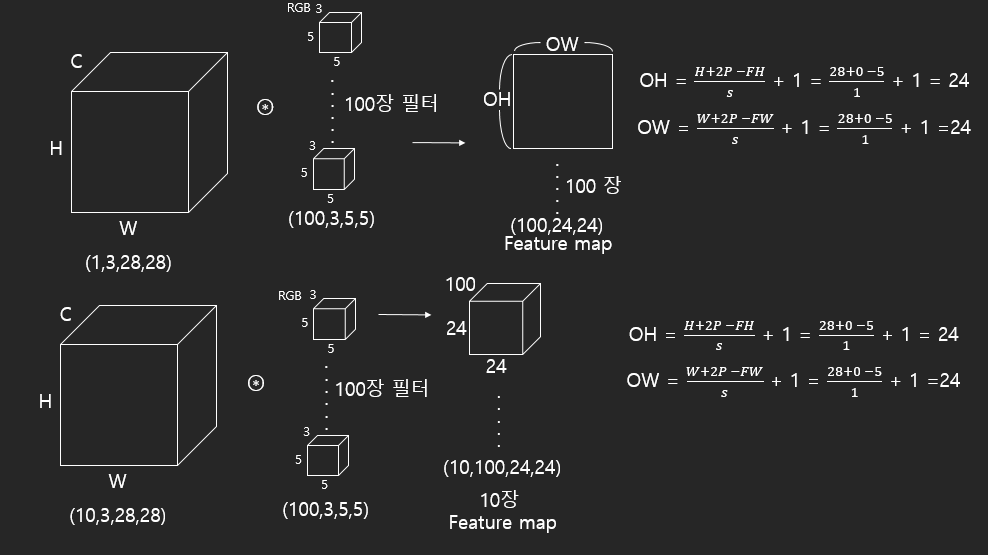

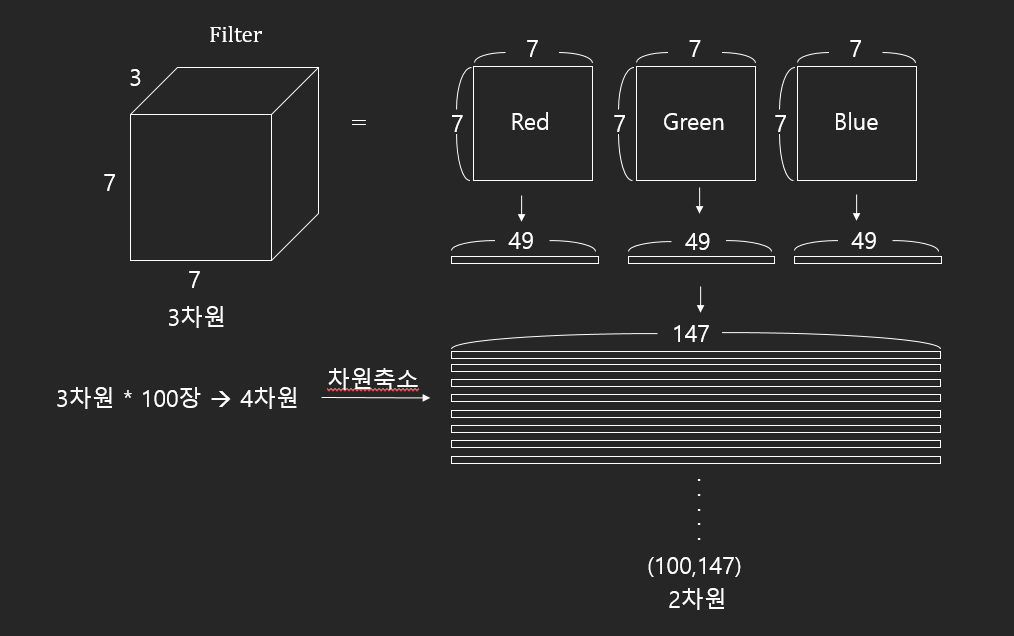

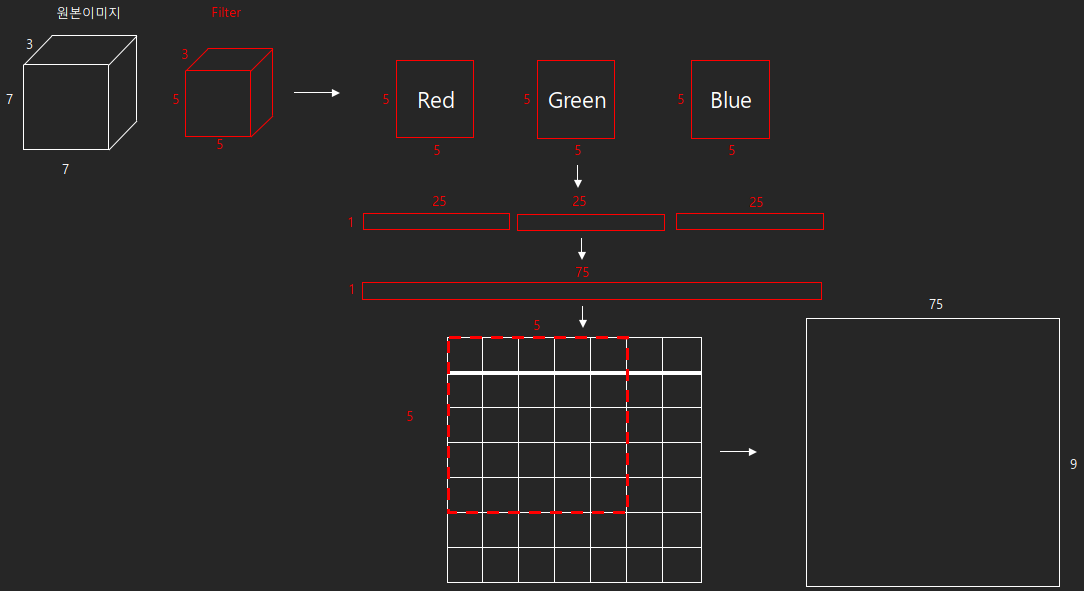

## ■ 합성곱 계층을 구현하기 위해 4차원을 2차원을 변경하는 방법

### " 왜 4차원을 2차원으로 변경해야하는가? "

합성곱 계층을 구현할 때 흘러가는 행렬이 4차원 행렬이 흘러가서 연산이 될 것인데 그러면 문제가 연산속도가 느려지므로  
행렬 계산을 할 때 행렬 연산을 빠르게 하려면 4차원이 아니라 2차원으로 차원축소가 필요하다.

그래서 필요한 함수 ? __" im2col 함수 "__ (p.234)

im2col 함수의 역활을 그림으로 표현(p.243) __그림 7-18__

im2col은 입력 데이터를 필터링(가중치 계산)을 하기 좋게 전개하는(펼치는) 함수입니다.

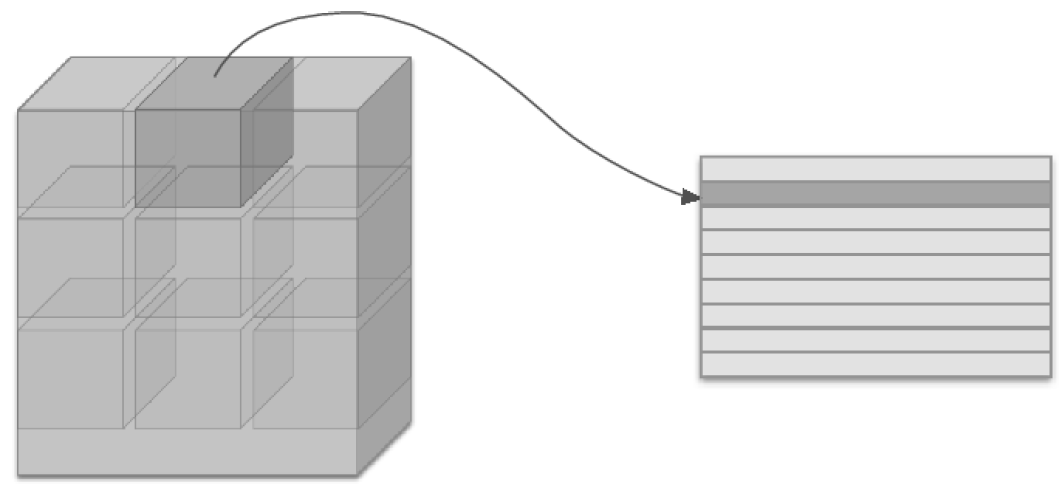

## 예제1. 가상의 아이린 사진을 10장 만드시오! ~ (RGB의 7x7 행렬 1장)

In [25]:
import numpy as np
x1 = np.random.rand(10,3,7,7) # rand = randn 둘다 같음.
print(x1.shape)

(10, 3, 7, 7)


## 예제2. im2col 함수를 이용해서 위에서 만든 아이린 사진 4차원을 2차원 행렬로 변경하시오~
## (필터는 5x5의 RGB 행렬 입니다.)

책245 페이지 : im2col( input_data, filter_h, filter_w, stride = 1 , pad = 0 )

In [27]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

import numpy as np
x1 = np.random.rand(10,3,7,7) # rand = randn 둘다 같음.
col = im2col(x1, 5, 5, stride = 1, pad =0)
print(col.shape) # (90, 75)

(90, 75)


## 예제3. 칠판에 나온 4차원 필터를 2차원 행렬로 변환 시키시오~

4차원(10,3,5,5)  -->   2차원(10, 75)

4차원(10,3,5,5)  -->   3차원(10, 3, 25)

In [30]:
filter = np.random.rand(10,3,5,5)
print(filter.reshape(10, 3, -1).shape)

(10, 3, 25)


### ※ 책 246 설명 :   
### reshape 에 -1을 지정했는데, 이는 reshape가 제공하는 편의기능입니다.  
### reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 묶어줍니다.  

In [31]:
filter = np.random.rand(10,3,5,5)
print(filter.reshape(10,-1).shape)

(10, 75)


## 예제4. 위의 2차원 필터를 전개시키시오~

(10,75) --(전치)--> (75,10)

In [33]:
filter = np.random.rand(10,3,5,5)
print(filter.reshape(10,-1).T.shape)

(75, 10)


## 예제5. 아이린 사진 10장을 filter 10장과 합성곱을 하는데 둘다 2차원으로 차원 축소해서 내적해서 (90,10) 행렬을 출력하시오!

In [37]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

import numpy as np
# 아이린 사진 10장
x1 = np.random.rand(10,3,7,7) # rand = randn 둘다 같음.
col = im2col(x1, 5, 5, stride = 1, pad =0)

# print(col.shape) # (90,75)

filter = np.random.rand(10,3,5,5)
w = filter.reshape(10,-1).T
out = np.dot(col,w)
print(out.shape)

(90, 10)


## 예제6. 위의 2차원을 4차원으로 변경하시오~

### 4차원 ------------> 2차원 (im2col 함수)

### 2차원(90, 10) ------------> 4차원(10, 3, 3, -1) (reshape)

### 4차원(10,3,3,10) ---- transpose ---> 4차원(10,10,3,3)

In [41]:
print(out.reshape(10,3,3,-1).shape)# (10, 3, 3, 10) 현재 채널 10이 마지막으로 위치한 상태

out2 = out.reshape(10,3,3,-1).transpose(0,3,1,2)
print(out2.shape) # (10,10,3,3)

(10, 3, 3, 10)
(10, 10, 3, 3)


## ■ Convolution층에서 일어나는 일 (p.246) ( 1-> 2 -> 3 -> 4)

1. 원본 이미지를 imn2col로 2차원 행렬로 변경한다.
2. filter를 reshape의 -1 옵션을 이용해서 2차원 행렬로 변경한다.
3. 두개의 2차원 행렬을 내적한다.
4. 내적한 2차원 행렬을 다시 4차원으로 변경한다.

### ※ convolution 층의 역활 ? 

__" 이미지의 특징을 추출하는 feature map을 여러개 만듭니다. " (면접문제)__

## 문제70. 책 246 페이지에 나오는 class Convolution을 생성하시오~

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

import numpy as np

class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H + 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out